In [1]:
import os
import numpy as np
import pandas as pd
import math
import matplotlib.pylab as plt
import seaborn as sns

%matplotlib inline
sns.set(style='ticks', palette='Set2')
!pip install graphviz

In [2]:
# Load data
path = "./churn2.csv"
df = pd.read_csv(path)[["COLLEGE", "INCOME", "OVERAGE", "LEFTOVER", "HOUSE","HANDSET_PRICE","OVER_15MINS_CALLS_PER_MONTH","AVERAGE_CALL_DURATION","REPORTED_SATISFACTION","REPORTED_USAGE_LEVEL","CONSIDERING_CHANGE_OF_PLAN","LEAVE"]].dropna()
# Take a look at the data
df.head(5)

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,LEAVE
0,zero,31953,0,6,313378,161,0,4,unsat,little,no,STAY
1,one,36147,0,13,800586,244,0,6,unsat,little,considering,STAY
2,one,27273,230,0,305049,201,16,15,unsat,very_little,perhaps,STAY
3,zero,120070,38,33,788235,780,3,2,unsat,very_high,considering,LEAVE
4,one,29215,208,85,224784,241,21,1,very_unsat,little,never_thought,STAY


In [3]:
df.dtypes

COLLEGE                        object
INCOME                          int64
OVERAGE                         int64
LEFTOVER                        int64
HOUSE                           int64
HANDSET_PRICE                   int64
OVER_15MINS_CALLS_PER_MONTH     int64
AVERAGE_CALL_DURATION           int64
REPORTED_SATISFACTION          object
REPORTED_USAGE_LEVEL           object
CONSIDERING_CHANGE_OF_PLAN     object
LEAVE                          object
dtype: object

In [4]:
# Transform COLLEGE column to a numeric variable
#df["COLLEGE2"] = (df.COLLEGE == "one").astype(int)
df["COLLEGE2"] = (df.COLLEGE == "one").astype(int)
#df = df.drop("COLLEGE", axis="columns")
#df = df.drop("COLLEGE", axis="columns")
df.head(5)

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,LEAVE,COLLEGE2
0,zero,31953,0,6,313378,161,0,4,unsat,little,no,STAY,0
1,one,36147,0,13,800586,244,0,6,unsat,little,considering,STAY,1
2,one,27273,230,0,305049,201,16,15,unsat,very_little,perhaps,STAY,1
3,zero,120070,38,33,788235,780,3,2,unsat,very_high,considering,LEAVE,0
4,one,29215,208,85,224784,241,21,1,very_unsat,little,never_thought,STAY,1


In [5]:
#df.REPORTED_SATISFACTION = df.REPORTED_SATISFACTION.astype('category')
#df.REPORTED_USAGE_LEVEL = df.REPORTED_USAGE_LEVEL.astype('category')
#df.CONSIDERING_CHANGE_OF_PLAN = df.CONSIDERING_CHANGE_OF_PLAN.astype('category')
#df.COLLEGE2 = df.COLLEGE2.astype('category')
###
df.REPORTED_SATISFACTION = df.REPORTED_SATISFACTION.astype('str')
df.REPORTED_USAGE_LEVEL = df.REPORTED_USAGE_LEVEL.astype('str')
df.CONSIDERING_CHANGE_OF_PLAN = df.CONSIDERING_CHANGE_OF_PLAN.astype('str')

In [6]:
df["LEAVE2"] = (df.LEAVE == "STAY").astype(int)
#df = df.drop("LEAVE", axis="columns")
df.head(5)

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,LEAVE,COLLEGE2,LEAVE2
0,zero,31953,0,6,313378,161,0,4,unsat,little,no,STAY,0,1
1,one,36147,0,13,800586,244,0,6,unsat,little,considering,STAY,1,1
2,one,27273,230,0,305049,201,16,15,unsat,very_little,perhaps,STAY,1,1
3,zero,120070,38,33,788235,780,3,2,unsat,very_high,considering,LEAVE,0,0
4,one,29215,208,85,224784,241,21,1,very_unsat,little,never_thought,STAY,1,1


In [7]:
df.dtypes

COLLEGE                        object
INCOME                          int64
OVERAGE                         int64
LEFTOVER                        int64
HOUSE                           int64
HANDSET_PRICE                   int64
OVER_15MINS_CALLS_PER_MONTH     int64
AVERAGE_CALL_DURATION           int64
REPORTED_SATISFACTION          object
REPORTED_USAGE_LEVEL           object
CONSIDERING_CHANGE_OF_PLAN     object
LEAVE                          object
COLLEGE2                        int32
LEAVE2                          int32
dtype: object

In [8]:
# Names of different columns
predictor_cols = ["INCOME", "OVERAGE","LEFTOVER","HOUSE","OVER_15MINS_CALLS_PER_MONTH","AVERAGE_CALL_DURATION","COLLEGE2"]
target_col = "LEAVE2"
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[predictor_cols],df[target_col],test_size = 0.25,random_state = 0)

In [9]:
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (15000, 7)
X_test shape: (5000, 7)
y_train shape: (15000,)
y_test shape: (5000,)


In [21]:
from sklearn.tree import DecisionTreeClassifier
# Let's define the model (tree)
decision_tree = DecisionTreeClassifier(max_depth=6, criterion="entropy",max_leaf_nodes = 12, min_samples_leaf = 1) 
# Let's tell the model what is the data
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, max_leaf_nodes=12)

./images/tree.dot
./images/tree.png


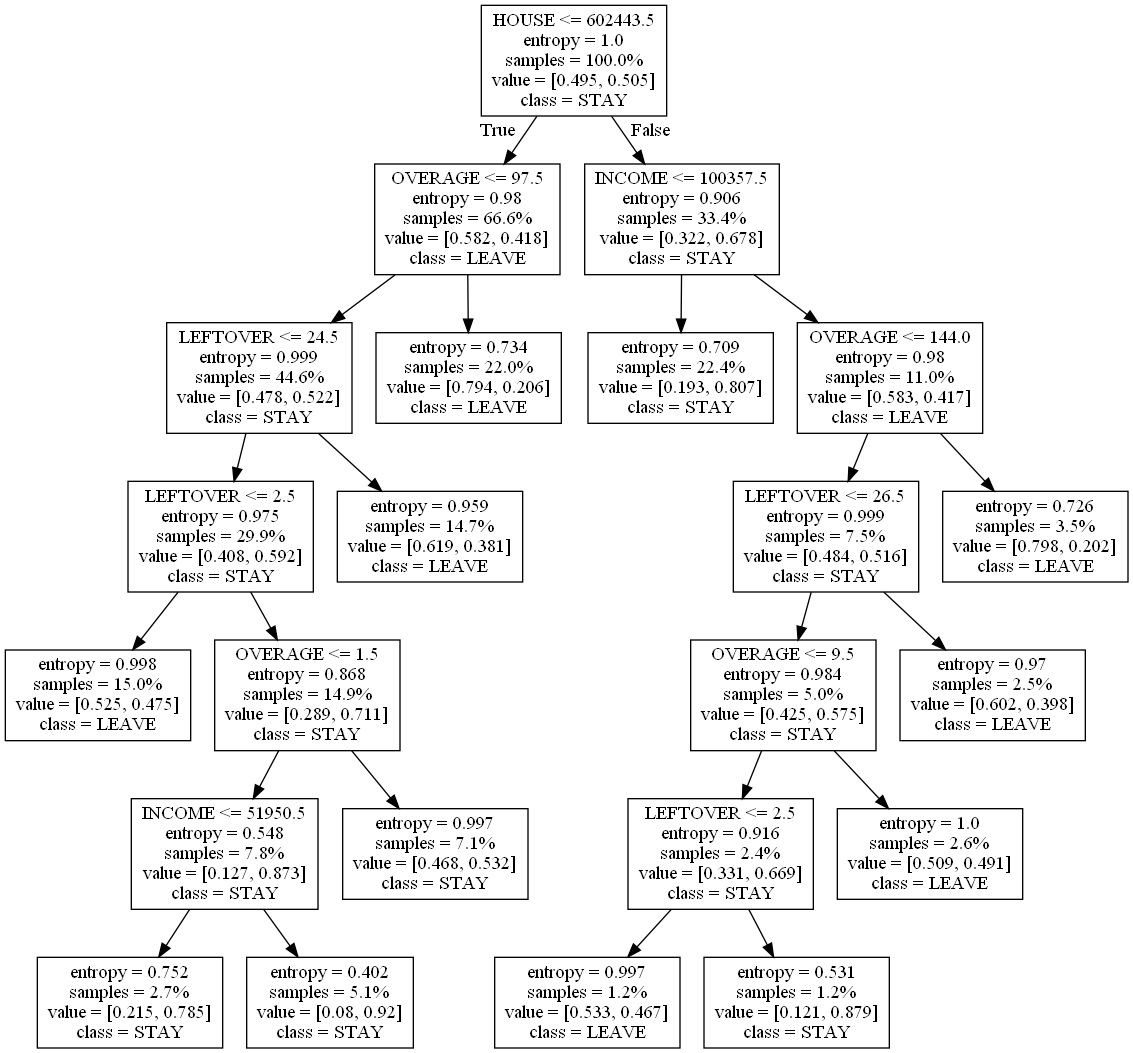

In [11]:
from IPython.display import Image
from sklearn.tree import export_graphviz

def visualize_tree(decision_tree, feature_names, class_names, directory="./images", name="tree",proportion=True):
    # Export our decision tree to graphviz format
    directory1 = directory[2:]
    os.system("mkdir %s" %(directory1))
    dot_name = "%s/%s.dot" % (directory, name)
    dot_file = export_graphviz(decision_tree, out_file=dot_name,feature_names=feature_names,class_names=class_names,
                               proportion=proportion)
    # Call graphviz to make an image file from our decision tree
    image_name = "%s/%s.png" % (directory, name)
    print(dot_name)
    print(image_name)
    #os.system("dot -Tpng %s  -o %s" % (dot_name, image_name))
    os.system("dot -Tpng %s  -o %s" % (dot_name, image_name))
    # os.system("cd %s" % (directory1))
    #subprocess.run("dot -T png %s -o %s" % (dot_name, image_name))
    # Return the .png image so we can see it
    
    return Image(filename=image_name)

visualize_tree(decision_tree, predictor_cols, ["LEAVE", "STAY"])
# The following URL in stackoverflow contains some useful information for reference
# https://stackoverflow.com/questions/27817994/visualizing-decision-tree-in-scikit-learn
# https://stackoverflow.com/questions/1494492/graphviz-how-to-go-from-dot-to-a-graph

In [12]:
y_pred = decision_tree.predict(X_test)
print("Test set score: {: 2f}".format(np.mean(y_pred == y_test)))

Test set score:  0.699200


In [13]:
from sklearn import metrics
print ( "Accuracy = %.3f" % (metrics.accuracy_score(decision_tree.predict(X_test), y_test) ))

Accuracy = 0.699


In [14]:
# predictor_cols = ["INCOME", "OVERAGE","LEFTOVER","HOUSE","OVER_15MINS_CALLS_PER_MONTH","AVERAGE_CALL_DURATION","COLLEGE2"]
X_new = np.array([[90000, 100,30,500000,3, 7,1]])
def Predict_for_New_Value(X_new):
    print("X_new.shape: {}".format(X_new.shape))
    prediction = decision_tree.predict(X_new)
    print("Prediction: {}".format(prediction))
    if(prediction == 0):
        return("LEAVE")
    elif(prediction == 1):
        return("STAY")
    else:
        return("UNKNOWN STATUS..")
    
predicted_status = Predict_for_New_Value(X_new)
print("Predicted value for new record is %s", predicted_status)


X_new.shape: (1, 7)
Prediction: [0]
Predicted value for new record is %s LEAVE


In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(max_depth=6, criterion="entropy",max_leaf_nodes = 12, min_samples_leaf = 1) 
scores = cross_val_score(decision_tree, X_test, y_test, cv=10)
print("Cross validation scores: {}".format(scores))

Cross validation scores: [0.678 0.718 0.674 0.696 0.668 0.692 0.702 0.698 0.714 0.728]


In [24]:

print("Average cross validation score: {:.2f}".format(scores.mean()))
print("Std. dev of cross validation score: {:.2f}".format(scores.std()))

Average cross validation score: 0.70
Std. dev of cross validation score: 0.02
